In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier

In [3]:
data = pd.read_excel("C:/Users/hp/SB/Fire Extinguishing Prediction/Data/Acoustic_Extinguisher_Fire_Dataset.xlsx")

In [4]:
data.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1


In [5]:
data.shape

(17442, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       17442 non-null  int64  
 1   FUEL       17442 non-null  object 
 2   DISTANCE   17442 non-null  int64  
 3   DESIBEL    17442 non-null  int64  
 4   AIRFLOW    17442 non-null  float64
 5   FREQUENCY  17442 non-null  int64  
 6   STATUS     17442 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 954.0+ KB


In [7]:
data.describe()

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
count,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000
mean,3.411765,100.000000,96.379142,6.975634,31.611111,0.497821
std,1.750977,54.773826,8.164096,4.736169,20.939149,0.500010
min,1.000000,10.000000,72.000000,0.000000,1.000000,0.000000
25%,2.000000,50.000000,90.000000,3.200000,14.000000,0.000000
50%,3.000000,100.000000,95.000000,5.800000,27.500000,0.000000
75%,5.000000,150.000000,104.000000,11.200000,47.000000,1.000000
max,7.000000,190.000000,113.000000,17.000000,75.000000,1.000000


In [58]:
data.isnull().sum()

SIZE         0
FUEL         0
DISTANCE     0
DESIBEL      0
AIRFLOW      0
FREQUENCY    0
STATUS       0
dtype: int64

In [59]:
data.value_counts()

SIZE  FUEL  DISTANCE  DESIBEL  AIRFLOW  FREQUENCY  STATUS
1     0     10        75       0.8      1          1         1
4     3     70        90       10.7     15         1         1
                      92       13.3     28         1         1
                               11.2     19         1         1
                               10.6     16         1         1
                                                            ..
2     3     130       102      4.4      48         0         1
                      103      3.7      51         0         1
                               5.2      44         0         1
                               5.6      40         0         1
7     2     190       105      0.0      72         0         1
Length: 17442, dtype: int64

In [8]:
data['STATUS'].value_counts()

0    8759
1    8683
Name: STATUS, dtype: int64

Text(0.5, 1.0, 'Pie chart showing the distribution of Status of the Fire ')

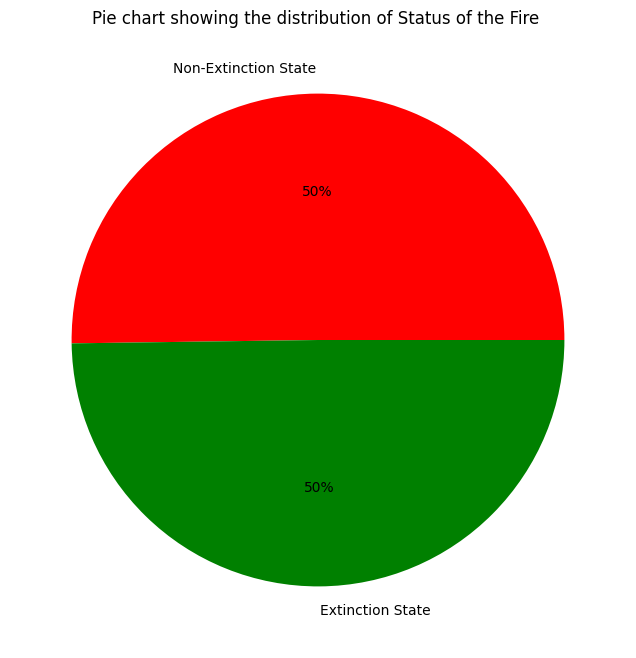

In [9]:
plt.figure(figsize = (8,8))
a = data['STATUS'].value_counts()
plt.pie(x = a, data = data, labels= ['Non-Extinction State','Extinction State'], autopct='%.0f%%',colors = 'rg')
plt.title("Pie chart showing the distribution of Status of the Fire ")

In [10]:
data['FUEL'].value_counts()

gasoline    5130
thinner     5130
kerosene    5130
lpg         2052
Name: FUEL, dtype: int64

Text(0.5, 1.0, 'Pie chart showing the distribution of Fuel of the Fire ')

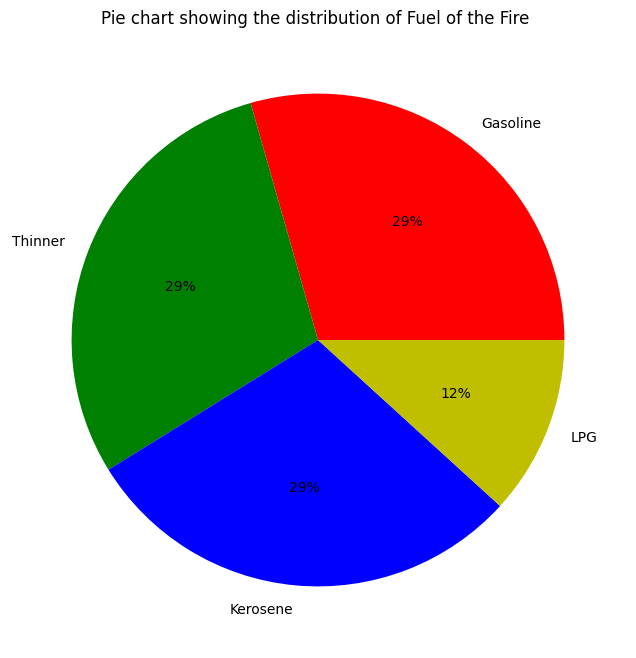

In [11]:
plt.figure(figsize = (8,8))
a = data['FUEL'].value_counts()
plt.pie(x = a, data = data, labels= ['Gasoline','Thinner','Kerosene','LPG'], autopct='%.0f%%',colors = 'rgby')
plt.title("Pie chart showing the distribution of Fuel of the Fire ")

In [12]:
data['SIZE'].value_counts()

1    3078
2    3078
3    3078
4    3078
5    3078
6    1026
7    1026
Name: SIZE, dtype: int64

<Axes: xlabel='SIZE', ylabel='count'>

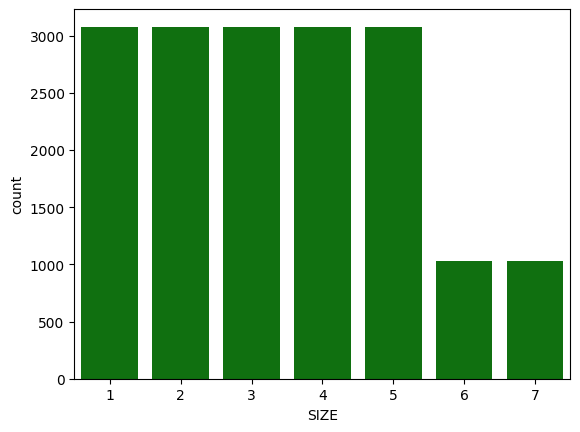

In [13]:
sns.countplot(x='SIZE',data=data, color='green')

<Axes: xlabel='DISTANCE', ylabel='count'>

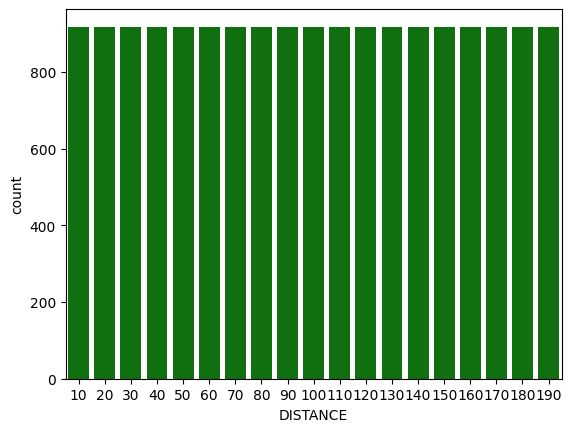

In [14]:
sns.countplot(x='DISTANCE',data=data, color='green')

In [15]:
data['DESIBEL'].min()

72

In [16]:
data['DESIBEL'].max()

113

In [17]:
data['DESIBEL'].value_counts()

92     1462
96     1360
106    1360
90     1105
105    1071
91      969
104     867
89      782
93      765
95      765
94      646
108     646
107     612
102     612
103     595
88      561
86      442
87      425
97      272
110     272
101     255
85      238
109     187
75      136
80      119
100     119
84      119
74      119
111     102
78       85
83       85
76       51
98       51
79       51
112      34
82       34
99       34
113      17
72       17
Name: DESIBEL, dtype: int64

(array([ 323.,  289., 1309., 4879., 3808., 1071., 4505., 1258.]),
 array([ 72.   ,  77.125,  82.25 ,  87.375,  92.5  ,  97.625, 102.75 ,
        107.875, 113.   ]),
 <BarContainer object of 8 artists>)

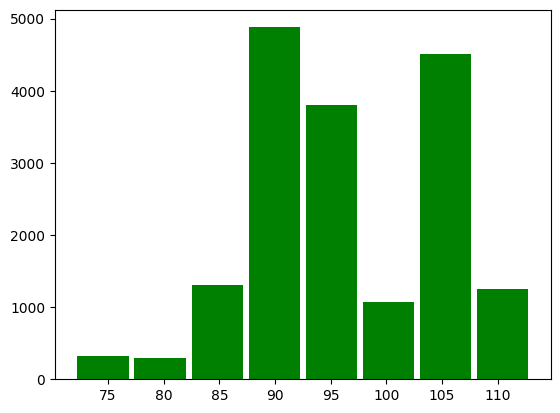

In [18]:
plt.hist(data['DESIBEL'], bins = 8, rwidth = 0.9,color = 'green')

In [19]:
data['AIRFLOW'].value_counts()

0.0     1632
3.7      374
3.2      357
4.2      306
11.0     306
        ... 
9.1       17
16.1      17
13.4      17
14.3      17
17.0      17
Name: AIRFLOW, Length: 127, dtype: int64

In [20]:
data['AIRFLOW'].min()

0.0

In [21]:
data['AIRFLOW'].max()

17.0

(array([2669., 3944., 2448., 1445., 1938., 2380., 1666.,  952.]),
 array([ 0.   ,  2.125,  4.25 ,  6.375,  8.5  , 10.625, 12.75 , 14.875,
        17.   ]),
 <BarContainer object of 8 artists>)

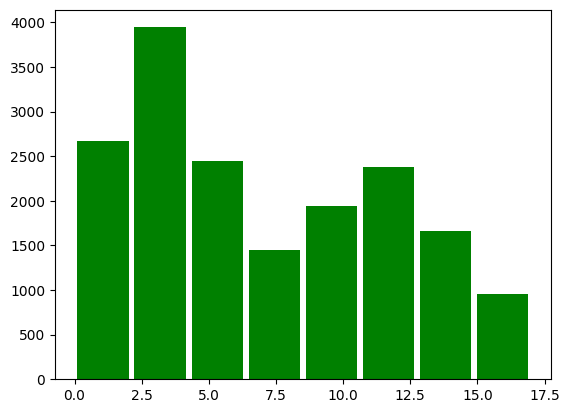

In [22]:
plt.hist(data['AIRFLOW'], bins = 8, rwidth = 0.9,color = 'green')

In [23]:
data['FREQUENCY'].value_counts()

75    323
14    323
25    323
24    323
23    323
22    323
21    323
20    323
19    323
18    323
17    323
16    323
15    323
13    323
72    323
12    323
11    323
10    323
9     323
8     323
7     323
6     323
5     323
4     323
3     323
2     323
26    323
27    323
28    323
30    323
70    323
68    323
67    323
66    323
65    323
60    323
55    323
52    323
51    323
50    323
48    323
47    323
46    323
45    323
44    323
42    323
40    323
38    323
36    323
35    323
34    323
33    323
32    323
1     323
Name: FREQUENCY, dtype: int64

In [24]:
data['FREQUENCY'].min()

1

In [25]:
data['FREQUENCY'].max()

75

(array([3230., 2907., 2907., 1938., 2261., 1615.,  646., 1938.]),
 array([ 1.  , 10.25, 19.5 , 28.75, 38.  , 47.25, 56.5 , 65.75, 75.  ]),
 <BarContainer object of 8 artists>)

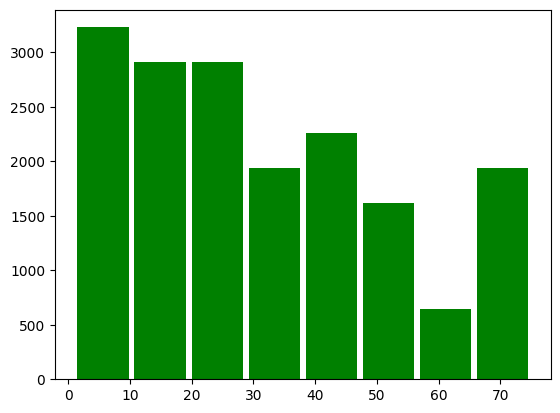

In [26]:
plt.hist(data['FREQUENCY'], bins = 8, rwidth = 0.9,color = 'green')

In [27]:
d1 = data[data['STATUS'] == 1]
d1.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1
5,1,gasoline,10,109,7.8,66,1


In [28]:
d2 = data[data['STATUS'] == 0]
d2.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
54,1,gasoline,20,96,0.0,75,0
55,1,gasoline,20,96,0.0,72,0
107,1,gasoline,20,76,1.0,1,0
108,1,gasoline,30,106,0.0,75,0


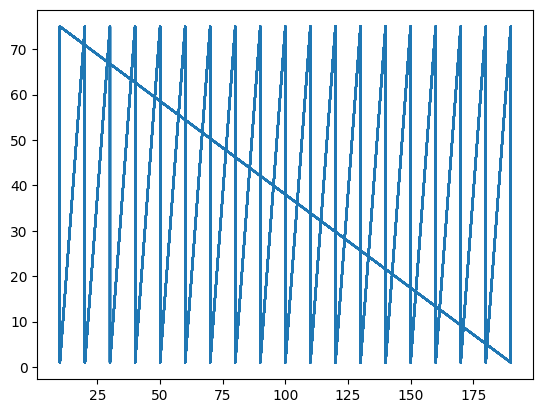

In [60]:
plt.plot(data['DISTANCE'],data['FREQUENCY'])

<Axes: xlabel='FUEL', ylabel='SIZE'>

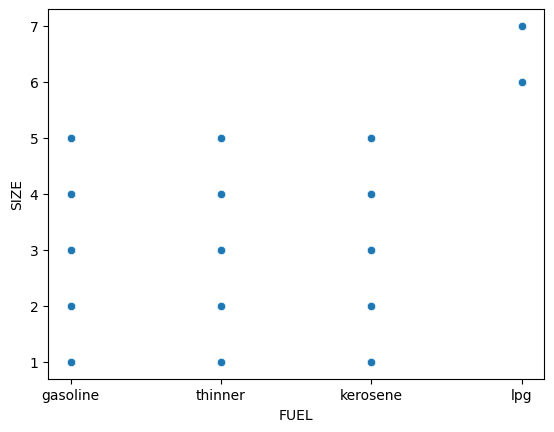

In [30]:
sns.scatterplot(data= d1, x='FUEL', y = 'SIZE')

In [31]:
lb = LabelEncoder()

In [32]:
data['FUEL'] = lb.fit_transform(data['FUEL'])

In [33]:
data.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,0,10,96,0.0,75,0
1,1,0,10,96,0.0,72,1
2,1,0,10,96,2.6,70,1
3,1,0,10,96,3.2,68,1
4,1,0,10,109,4.5,67,1


In [34]:
data['FUEL'].value_counts()

0    5130
3    5130
1    5130
2    2052
Name: FUEL, dtype: int64

In [35]:
X = data.drop('STATUS',axis = 1)
y = data['STATUS']

In [61]:
print(X.shape)
print(y.shape)

(17442, 6)
(17442,)


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [37]:
def model_evaluation(classifier):
    cm = confusion_matrix(y_test, classifier.predict(X_test))
    counts = [value for value in cm.flatten()]
    labels = [f'{v1}' for v1 in counts]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot = labels, cmap = 'Greens', fmt = '')
    y_pred = classifier.predict(X_test)
    yt_pred = classifier.predict(X_train)
    print('The Training Accuracy of the algorithm is ', accuracy_score(y_train, yt_pred))
    print('The Testing Accuracy of the algorithm is ', accuracy_score(y_test, y_pred))
    return [(accuracy_score(y_train * 100, yt_pred * 100) * 100), (accuracy_score(y_test * 100, y_pred * 100) * 100), precision_score(y_test, y_pred)]

In [38]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

The Training Accuracy of the algorithm is  0.9434530208557299
The Testing Accuracy of the algorithm is  0.9180280882774434


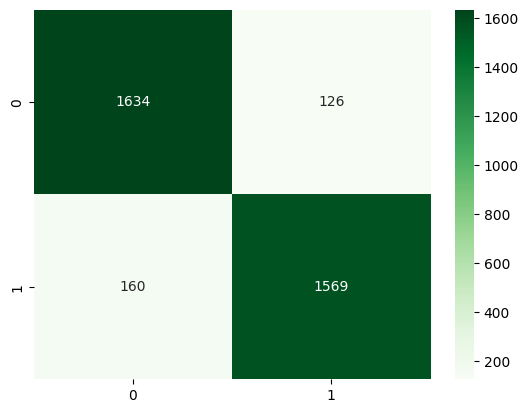

In [39]:
knn_r = model_evaluation(knn)

In [40]:
Svm = SVC()
Svm.fit(X_train, y_train)

SVC()

The Training Accuracy of the algorithm is  0.8893427936644449
The Testing Accuracy of the algorithm is  0.8936658068214388


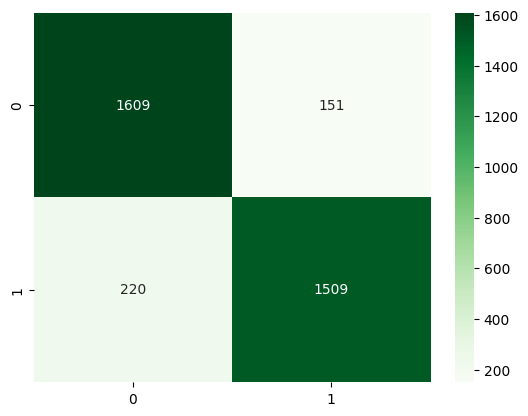

In [41]:
Svm_r = model_evaluation(Svm)

In [42]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

The Training Accuracy of the algorithm is  0.8705654697914427
The Testing Accuracy of the algorithm is  0.8741759816566351


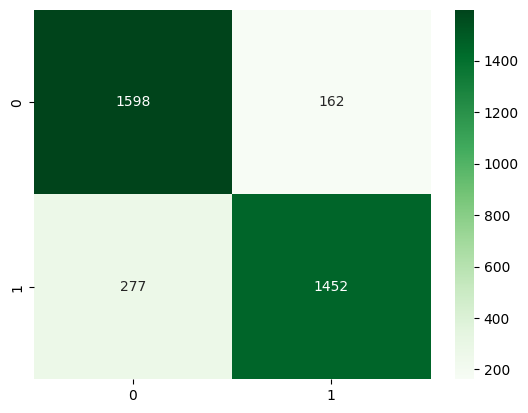

In [43]:
gnb_r = model_evaluation(gnb)

In [44]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

The Training Accuracy of the algorithm is  0.874292266896008
The Testing Accuracy of the algorithm is  0.881914588707366


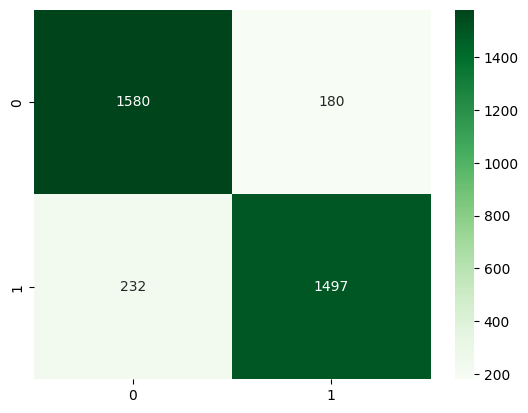

In [45]:
lr_r = model_evaluation(lr)

In [46]:
dt = DecisionTreeClassifier(max_depth= 11)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=11)

The Training Accuracy of the algorithm is  0.98602451085788
The Testing Accuracy of the algorithm is  0.9707652622527945


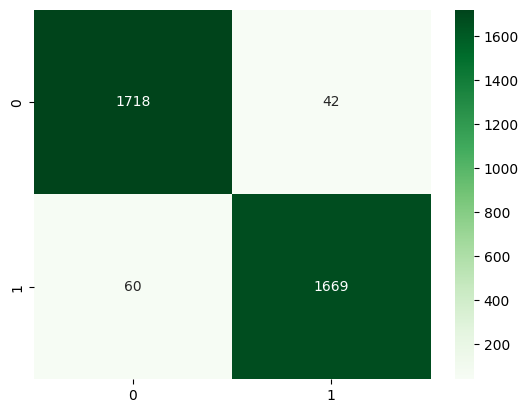

In [47]:
dt_r = model_evaluation(dt)

In [48]:
rf = RandomForestClassifier(max_depth=11)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=11)

The Training Accuracy of the algorithm is  0.9873862251845481
The Testing Accuracy of the algorithm is  0.9618801948982516


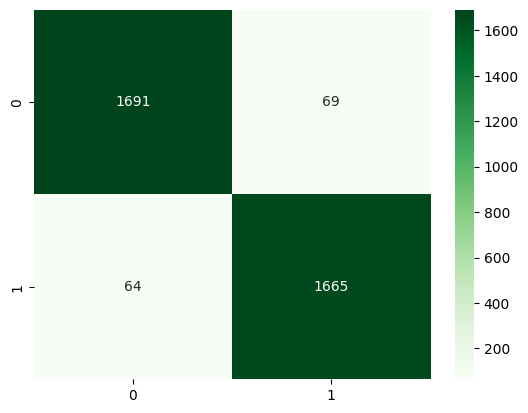

In [49]:
rf_r = model_evaluation(rf)

In [50]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

The Training Accuracy of the algorithm is  0.9530566903174944
The Testing Accuracy of the algorithm is  0.9507022069360849


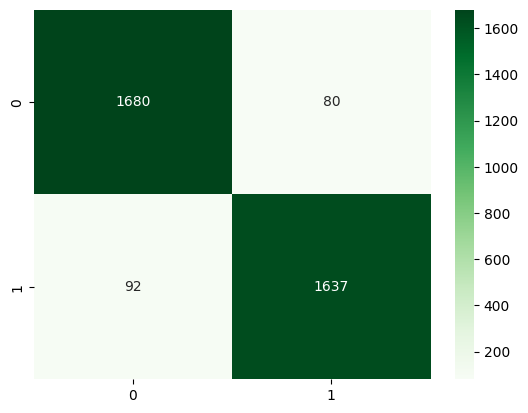

In [51]:
gb_r = model_evaluation(gb)

In [52]:
results = pd.DataFrame(data = [knn_r, Svm_r, gnb_r, lr_r,dt_r, rf_r, gb_r],
                       columns = ['Training Accuracy', 'Testing Accuracy', 'Precision Score'],
                        index = ['K Nearest Neighbors', 'Support Vector Machines',
                                 'Naive Bayes', 'Logistic Regression',
                                 'Decision Tree', 'Random Forest', 'Gradient Boost'])

In [53]:
results

,Training Accuracy,Testing Accuracy,Precision Score
K Nearest Neighbors,94.345302,91.802809,0.925664
Support Vector Machines,88.934279,89.366581,0.909036
Naive Bayes,87.056547,87.417598,0.899628
Logistic Regression,87.429227,88.191459,0.892665
Decision Tree,98.602451,97.076526,0.975453
Random Forest,98.738623,96.188019,0.960208
Gradient Boost,95.305669,95.070221,0.953407


In [54]:
total = [[1,0,20,80,4.0,4]]
d1 = pd.DataFrame(data = total, columns = ['SIZE','FUEL','DISTANCE','DESIBEL','AIRFLOW','FREQUENCY'])
d1

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY
0,1,0,20,80,4.0,4


In [55]:
a1 = rf.predict(d1)
a1

array([1], dtype=int64)

In [56]:
a1[0]

1

In [57]:
pickle.dump(rf, open('model.pkl','wb'))